In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("customer_feedback_satisfaction.csv")

print("Dataset Shape (Rows, Columns):")
print(df.shape)

print("\nColumn Names:")
print(df.columns)

print("\nFirst 5 Rows:")
print(df.head())


Dataset Shape (Rows, Columns):
(38444, 11)

Column Names:
Index(['CustomerID', 'Age', 'Gender', 'Country', 'Income', 'ProductQuality',
       'ServiceQuality', 'PurchaseFrequency', 'FeedbackScore', 'LoyaltyLevel',
       'SatisfactionScore'],
      dtype='object')

First 5 Rows:
   CustomerID  Age  Gender Country  Income  ProductQuality  ServiceQuality  \
0           1   56    Male      UK   83094               5               8   
1           2   69    Male      UK   86860              10               2   
2           3   46  Female     USA   60173               8              10   
3           4   32  Female      UK   73884               7              10   
4           5   60    Male      UK   97546               6               4   

   PurchaseFrequency FeedbackScore LoyaltyLevel  SatisfactionScore  
0                  5           Low       Bronze              100.0  
1                  8        Medium         Gold              100.0  
2                 18        Medium       Sil

In [2]:
print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows:")
print(df.duplicated().sum())



Missing Values:
CustomerID           0
Age                  0
Gender               0
Country              0
Income               0
ProductQuality       0
ServiceQuality       0
PurchaseFrequency    0
FeedbackScore        0
LoyaltyLevel         0
SatisfactionScore    0
dtype: int64

Duplicate Rows:
0


In [3]:
country_sat = df.groupby("Country")["SatisfactionScore"].mean()
print("\nCountry-wise Satisfaction:")
print(country_sat)



Country-wise Satisfaction:
Country
Canada     85.413063
France     85.263078
Germany    85.261685
UK         85.061609
USA        85.379818
Name: SatisfactionScore, dtype: float64


In [4]:
gender_sat = df.groupby("Gender")["SatisfactionScore"].mean()
print("\nGender-wise Satisfaction:")
print(gender_sat)



Gender-wise Satisfaction:
Gender
Female    85.403998
Male      85.147861
Name: SatisfactionScore, dtype: float64


In [5]:
loyalty_sat = df.groupby("LoyaltyLevel")["SatisfactionScore"].mean()
print("\nLoyalty vs Satisfaction:")
print(loyalty_sat)



Loyalty vs Satisfaction:
LoyaltyLevel
Bronze    85.411651
Gold      85.135233
Silver    85.283576
Name: SatisfactionScore, dtype: float64


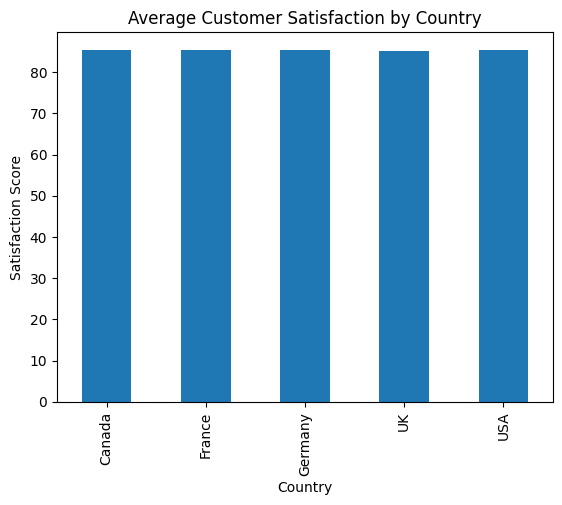

In [6]:
import matplotlib.pyplot as plt

country_sat.plot(kind="bar")
plt.title("Average Customer Satisfaction by Country")
plt.xlabel("Country")
plt.ylabel("Satisfaction Score")
plt.show()


C:\Users\yvhar\AppData\Local\Temp\ipykernel_3088\3541833312.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sat = df.groupby("AgeGroup")["SatisfactionScore"].mean()


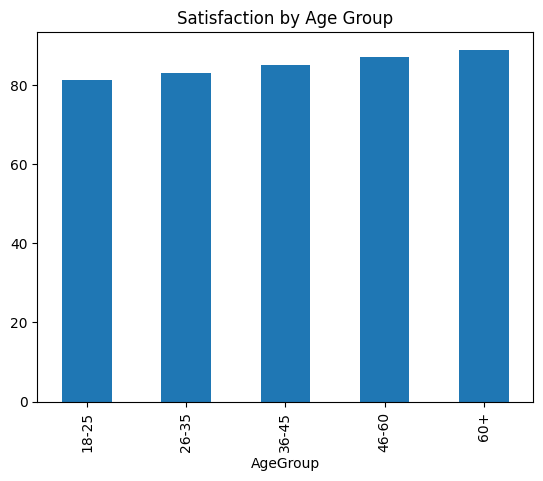

In [7]:
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[18,25,35,45,60,80],
    labels=["18-25","26-35","36-45","46-60","60+"]
)

age_sat = df.groupby("AgeGroup")["SatisfactionScore"].mean()
age_sat.plot(kind="bar", title="Satisfaction by Age Group")
plt.show()


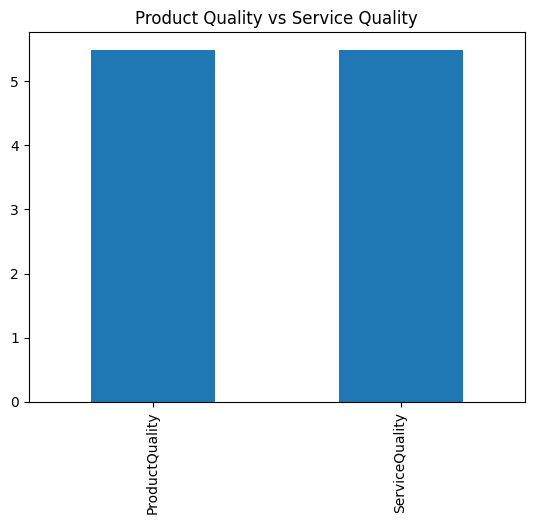

In [8]:
df[["ProductQuality", "ServiceQuality"]].mean().plot(kind="bar")
plt.title("Product Quality vs Service Quality")
plt.show()


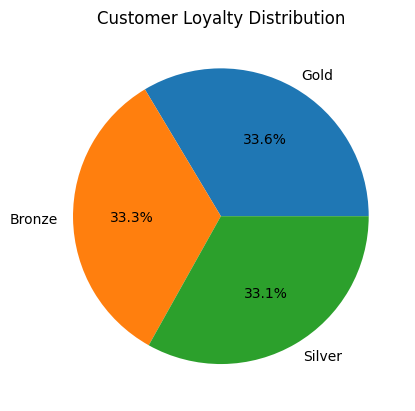

In [9]:
df["LoyaltyLevel"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Customer Loyalty Distribution")
plt.ylabel("")
plt.show()


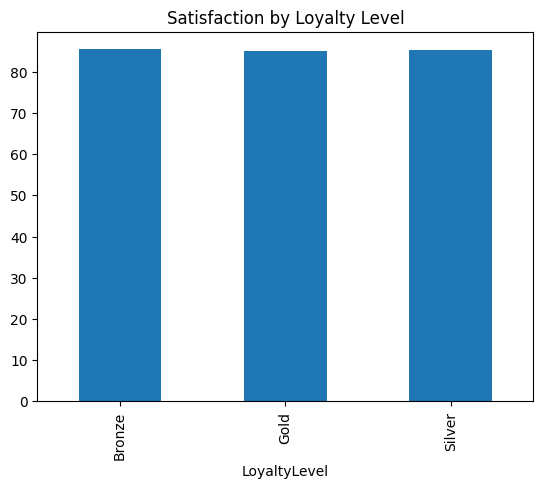

In [10]:
df.groupby("LoyaltyLevel")["SatisfactionScore"].mean().plot(kind="bar")
plt.title("Satisfaction by Loyalty Level")
plt.show()


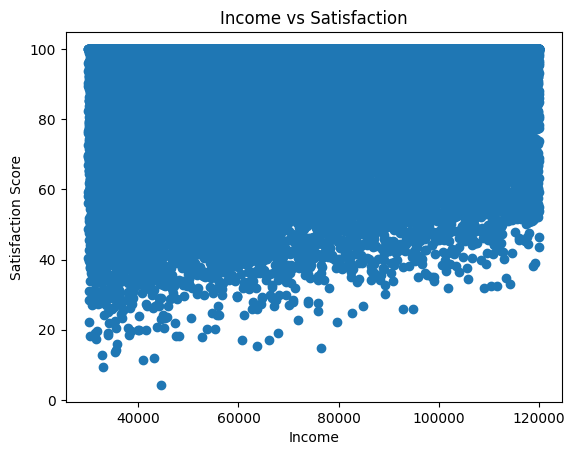

In [11]:
plt.scatter(df["Income"], df["SatisfactionScore"])
plt.xlabel("Income")
plt.ylabel("Satisfaction Score")
plt.title("Income vs Satisfaction")
plt.show()


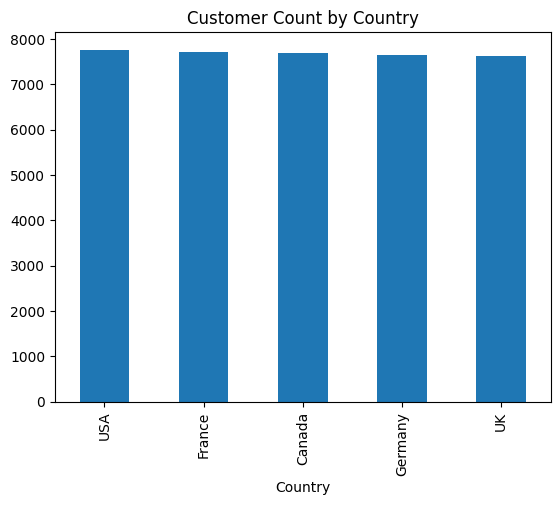

In [12]:
df["Country"].value_counts().plot(kind="bar")
plt.title("Customer Count by Country")
plt.show()
